In [1]:
# Importing necessary llibraries

import pandas as pd
import numpy as py
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# reading the csv file musk_csv

data=pd.read_csv('musk_csv.csv')

In [3]:
data.head()

ID molecule_name conformation_name  f1   f2   f3  f4   f5  f6  f7  ...  \
0   1      MUSK-211           211_1+1  46 -108  -60 -69 -117  49  38  ...   
1   2      MUSK-211          211_1+10  41 -188 -145  22 -117  -6  57  ...   
2   3      MUSK-211          211_1+11  46 -194 -145  28 -117  73  57  ...   
3   4      MUSK-211          211_1+12  41 -188 -145  22 -117  -7  57  ...   
4   5      MUSK-211          211_1+13  41 -188 -145  22 -117  -7  57  ...   

   f158  f159  f160  f161  f162  f163  f164  f165  f166  class  
0  -308    52    -7    39   126   156   -50  -112    96      1  
1   -59    -2    52   103   136   169   -61  -136    79      1  
2  -134  -154    57   143   142   165   -67  -145    39      1  
3   -60    -4    52   104   136   168   -60  -135    80      1  
4   -60    -4    52   104   137   168   -60  -135    80      1  

[5 rows x 170 columns]

In [4]:
data.describe()

ID           f1           f2           f3           f4  \
count  6598.00000  6598.000000  6598.000000  6598.000000  6598.000000   
mean   3299.50000    58.945135  -119.128524   -73.146560    -0.628372   
std    1904.82287    53.249007    90.813375    67.956235    80.444617   
min       1.00000   -31.000000  -199.000000  -167.000000  -114.000000   
25%    1650.25000    37.000000  -193.000000  -137.000000   -70.000000   
50%    3299.50000    44.000000  -149.000000   -99.000000   -25.000000   
75%    4948.75000    53.000000   -95.000000   -19.000000    42.000000   
max    6598.00000   292.000000    95.000000    81.000000   161.000000   

                f5           f6           f7           f8           f9  ...  \
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000  ...   
mean   -103.533495    18.359806   -14.108821    -1.858290   -86.003031  ...   
std      64.387559    80.593655   115.315673    90.372537   108.326676  ...   
min    -118.000000  -183.000000  -171.000000  -225.000000  -245.000000  ...   
25%    -117.000000   -28.000000  -159.000000   -85.000000  -217.000000  ...   
50%    -117.000000    33.000000    27.000000    19.000000   -40.000000  ...   
75%    -116.000000    74.000000    57.000000    61.000000   -21.000000  ...   
max     325.000000   200.000000   220.000000   320.000000   147.000000  ...   

              f158         f159         f160         f161         f162  \
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000   
mean   -184.798272   -75.795696   -26.073204    64.616702   112.037739   
std     107.819514   127.861271    69.727964   100.861935    72.835040   
min    -328.000000  -219.000000  -136.000000  -120.000000   -69.000000   
25%    -272.000000  -205.000000   -70.000000   -18.000000    71.000000   
50%    -234.000000  -131.000000   -21.000000    61.500000   107.000000   
75%     -80.000000    52.000000     9.000000   149.000000   129.000000   
max      94.000000   179.000000   192.000000   411.000000   355.000000   

              f163         f164         f165         f166        class  
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000  
mean    201.760230   -47.488330  -150.259927    41.770233     0.154138  
std      59.526751    55.069365    76.019023    94.116085     0.361108  
min      73.000000  -289.000000  -428.000000  -471.000000     0.000000  
25%     166.000000   -68.000000  -179.000000    -9.000000     0.000000  
50%     191.000000   -60.000000  -150.000000    27.000000     0.000000  
75%     215.000000   -45.000000  -120.000000   119.000000     0.000000  
max     625.000000   295.000000   168.000000   367.000000     1.000000  

[8 rows x 168 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [6]:
# Checking for the null values in the dataset
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

### Data Preprocessing

In [7]:
data.head()

ID molecule_name conformation_name  f1   f2   f3  f4   f5  f6  f7  ...  \
0   1      MUSK-211           211_1+1  46 -108  -60 -69 -117  49  38  ...   
1   2      MUSK-211          211_1+10  41 -188 -145  22 -117  -6  57  ...   
2   3      MUSK-211          211_1+11  46 -194 -145  28 -117  73  57  ...   
3   4      MUSK-211          211_1+12  41 -188 -145  22 -117  -7  57  ...   
4   5      MUSK-211          211_1+13  41 -188 -145  22 -117  -7  57  ...   

   f158  f159  f160  f161  f162  f163  f164  f165  f166  class  
0  -308    52    -7    39   126   156   -50  -112    96      1  
1   -59    -2    52   103   136   169   -61  -136    79      1  
2  -134  -154    57   143   142   165   -67  -145    39      1  
3   -60    -4    52   104   136   168   -60  -135    80      1  
4   -60    -4    52   104   137   168   -60  -135    80      1  

[5 rows x 170 columns]

In [8]:
data.tail()

ID  molecule_name conformation_name  f1   f2  f3   f4   f5   f6   f7  \
6593  6594  NON-MUSK-jp13          jp13_2+5  51 -123 -23 -108 -117  134 -160   
6594  6595  NON-MUSK-jp13          jp13_2+6  44 -104 -19 -105 -117  142 -165   
6595  6596  NON-MUSK-jp13          jp13_2+7  44 -102 -19 -104 -117   72 -165   
6596  6597  NON-MUSK-jp13          jp13_2+8  51 -121 -23 -106 -117   63 -161   
6597  6598  NON-MUSK-jp13          jp13_2+9  51 -122 -23 -106 -117  190 -161   

      ...  f158  f159  f160  f161  f162  f163  f164  f165  f166  class  
6593  ...   -66   164   -14   -29   107   171   -44  -115   118      0  
6594  ...   -51   166    -9   150   129   158   -66  -144    -5      0  
6595  ...    90   117    -8   150   130   159   -66  -144    -6      0  
6596  ...    86    99   -14   -31   106   171   -44  -116   117      0  
6597  ...    40   124   -14   -30   107   171   -44  -115   118      0  

[5 rows x 170 columns]

In [9]:
data=data.drop(['ID','molecule_name','conformation_name'],axis=1)

### Dropping ID , Molucle_Name and Conformation_Name as it is name of the molecule

In [10]:
data

f1   f2   f3   f4   f5   f6   f7   f8   f9  f10  ...  f158  f159  f160  \
0     46 -108  -60  -69 -117   49   38 -161   -8    5  ...  -308    52    -7   
1     41 -188 -145   22 -117   -6   57 -171  -39 -100  ...   -59    -2    52   
2     46 -194 -145   28 -117   73   57 -168  -39  -22  ...  -134  -154    57   
3     41 -188 -145   22 -117   -7   57 -170  -39  -99  ...   -60    -4    52   
4     41 -188 -145   22 -117   -7   57 -170  -39  -99  ...   -60    -4    52   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
6593  51 -123  -23 -108 -117  134 -160   82 -230  -28  ...   -66   164   -14   
6594  44 -104  -19 -105 -117  142 -165   68 -225  -32  ...   -51   166    -9   
6595  44 -102  -19 -104 -117   72 -165   65 -219  -12  ...    90   117    -8   
6596  51 -121  -23 -106 -117   63 -161   79 -224  -30  ...    86    99   -14   
6597  51 -122  -23 -106 -117  190 -161   80 -227  -52  ...    40   124   -14   

      f161  f162  f163  f164  f165  f166  class  
0       39   126   156   -50  -112    96      1  
1      103   136   169   -61  -136    79      1  
2      143   142   165   -67  -145    39      1  
3      104   136   168   -60  -135    80      1  
4      104   137   168   -60  -135    80      1  
...    ...   ...   ...   ...   ...   ...    ...  
6593   -29   107   171   -44  -115   118      0  
6594   150   129   158   -66  -144    -5      0  
6595   150   130   159   -66  -144    -6      0  
6596   -31   106   171   -44  -116   117      0  
6597   -30   107   171   -44  -115   118      0  

[6598 rows x 167 columns]

### Shuffeling the dataframe as musk and non musk are in top and bottom

In [11]:
import sklearn

In [12]:
from sklearn.utils import shuffle
data = shuffle(data)

In [13]:
data

f1   f2   f3   f4   f5   f6   f7   f8   f9  f10  ...  f158  f159  f160  \
1952  44 -102  -18  -82  -94  -21 -164   42 -197  -22  ...  -100    24    -8   
930   50 -108  -19  -50 -117  -82  -55  -24 -119  -49  ...  -145   -56   -17   
3580  48 -195 -144   27 -117  -81   58   20   84 -124  ...  -259  -213    14   
3195  35 -196 -162   99  -82    5  -30   -3  100 -181  ...  -267  -207   -11   
5234  44   86   14  -48 -117   47 -162   98 -219    4  ...  -218    69     8   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
3585  51 -123  -23  -30 -117   55 -163   44 -208  -16  ...  -167    55   -14   
5346  36  -53 -109  130 -117 -149   87    8  -31  -58  ...   -50  -184   -78   
326   45  -82  -63  -65 -116   60  172 -126  -16    8  ...  -301    63   -20   
3420  51 -121  -23  -49 -117   41 -162  175 -223  -41  ...   -73     5   -14   
3616  48 -193 -126   27 -108  -81   56   20   -9  -64  ...  -286  -213    12   

      f161  f162  f163  f164  f165  f166  class  
1952   150   129   156   -66  -142    -3      0  
930    -48    97   168   -47  -118   109      1  
3580   155   131   187   -72  -172    15      0  
3195    19   110   202   -53  -154   120      0  
5234   143   122   165   -66  -150   -15      0  
...    ...   ...   ...   ...   ...   ...    ...  
3585   -31   106   172   -44  -116   119      0  
5346   -94    93   213   -52  -162   129      0  
326    151   135   153   -65  -138    -1      1  
3420   -31   106   172   -44  -116   118      0  
3616   155   130   186   -72  -171    17      0  

[6598 rows x 167 columns]

In [14]:
x=data.drop('class',axis=1)

In [15]:
x

f1   f2   f3   f4   f5   f6   f7   f8   f9  f10  ...  f157  f158  f159  \
1952  44 -102  -18  -82  -94  -21 -164   42 -197  -22  ...  -185  -100    24   
930   50 -108  -19  -50 -117  -82  -55  -24 -119  -49  ...  -232  -145   -56   
3580  48 -195 -144   27 -117  -81   58   20   84 -124  ...  -243  -259  -213   
3195  35 -196 -162   99  -82    5  -30   -3  100 -181  ...  -229  -267  -207   
5234  44   86   14  -48 -117   47 -162   98 -219    4  ...  -236  -218    69   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
3585  51 -123  -23  -30 -117   55 -163   44 -208  -16  ...  -247  -167    55   
5346  36  -53 -109  130 -117 -149   87    8  -31  -58  ...  -177   -50  -184   
326   45  -82  -63  -65 -116   60  172 -126  -16    8  ...  -239  -301    63   
3420  51 -121  -23  -49 -117   41 -162  175 -223  -41  ...  -246   -73     5   
3616  48 -193 -126   27 -108  -81   56   20   -9  -64  ...  -242  -286  -213   

      f160  f161  f162  f163  f164  f165  f166  
1952    -8   150   129   156   -66  -142    -3  
930    -17   -48    97   168   -47  -118   109  
3580    14   155   131   187   -72  -172    15  
3195   -11    19   110   202   -53  -154   120  
5234     8   143   122   165   -66  -150   -15  
...    ...   ...   ...   ...   ...   ...   ...  
3585   -14   -31   106   172   -44  -116   119  
5346   -78   -94    93   213   -52  -162   129  
326    -20   151   135   153   -65  -138    -1  
3420   -14   -31   106   172   -44  -116   118  
3616    12   155   130   186   -72  -171    17  

[6598 rows x 166 columns]

In [16]:
# Normalising the dataset to increase the data to increse the accuracy of the model

from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns, index=x.index)

C:\Users\mdara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
y=data['class']

In [20]:
# Splitting training and test set

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=999)

In [22]:
input_dim=X_train.shape[1]

### Importing the Sequential model and Dense and Dropout Layers

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
modell=Sequential()

In [25]:
# Adding the input layer
modell.add(Dense(input_dim,kernel_initializer='uniform',activation='relu'))

In [26]:
# Adding hidden layer
modell.add(Dense(100,kernel_initializer='uniform',activation='relu'))

In [27]:
# Adding output layer
modell.add(Dense(1,kernel_initializer='uniform',activation='relu'))

In [28]:
# Compling the model
modell.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [29]:
# Trainning the model with training data
modell.fit(py.array(X_train),py.array(y_train),epochs=100,batch_size=2500,verbose=0)

In [30]:
# Fitting the model for training and validation data
modell.fit(py.array(X_train),py.array(y_train),validation_data=(py.array(X_test),py.array(y_test)),
           epochs=100,batch_size=2500,verbose=0)

### Importing Matplotlib to plot accuracy and loss graph

In [31]:
 import matplotlib.pyplot as plt 

In [32]:
# Storing the history of the model in history 
history=modell.fit(py.array(X_train),py.array(y_train),validation_data=(py.array(X_test),py.array(y_test)),epochs=100,
                   batch_size=2500,verbose=0)

In [33]:
 print(history.history.keys()) 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


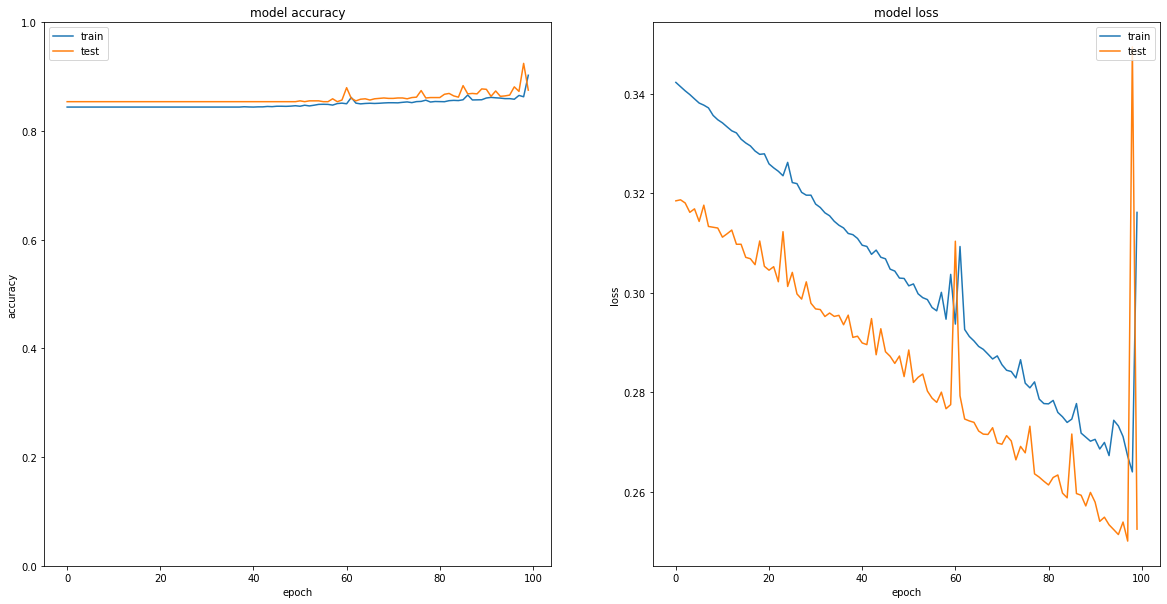

In [34]:
# Ploting the graphs for accuracy and loss 


fig = plt.figure(figsize=(20,10))
plt.subplot(121)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.ylim(0,1)

# summarize history for loss  
plt.subplots_adjust(right=0.9,wspace=0.2)   
plt.subplot(122)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right') 

plt.show()


In [35]:

# evaluate the model
met_train= modell.evaluate(X_train, y_train, verbose=0)
met_test= modell.evaluate(X_test, y_test, verbose=0)


In [36]:
print("train loss= %0.2f,train accuracy=%0.2f"%(met_train[0],100*float(met_train[1])))

train loss= 0.27,train accuracy=86.24


In [42]:
print("test loss = %0.2f,test accuracy=%0.2f "%(met_test[0],100*float(met_test[1])))

test loss = 0.25,test accuracy=87.50 


In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
yhat_classes = modell.predict_classes(X_test, verbose=0)

In [41]:
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Precision: 1.000000
Recall: 0.145078
F1 score: 0.253394
